<a href="https://colab.research.google.com/github/SpiderOutLost/Autumn_2022/blob/main/%D0%9D%D0%B5%D1%8F%D0%B2%D0%BD%D1%8B%D0%B9_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

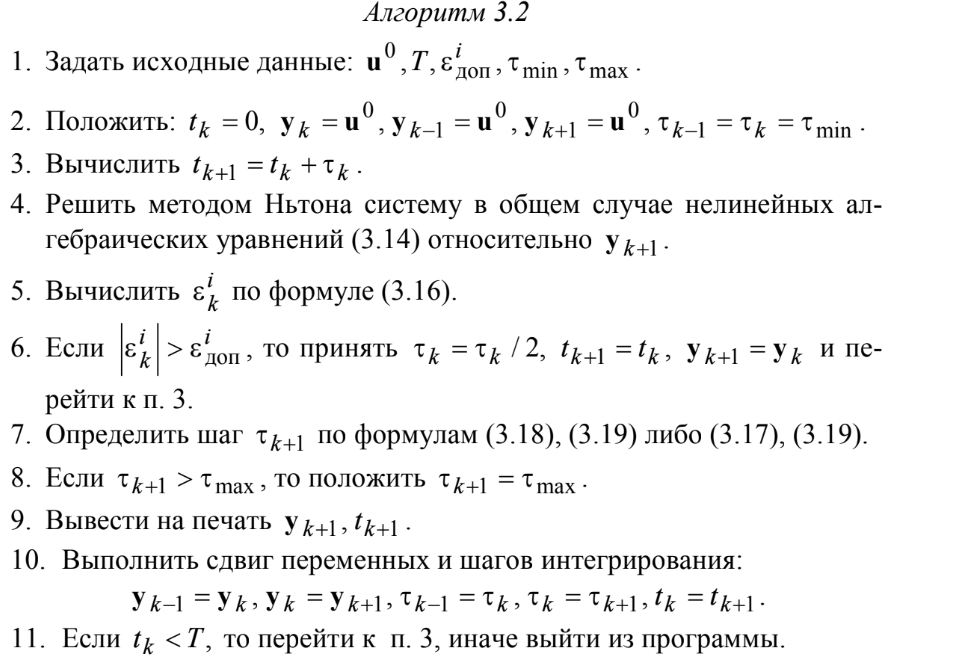

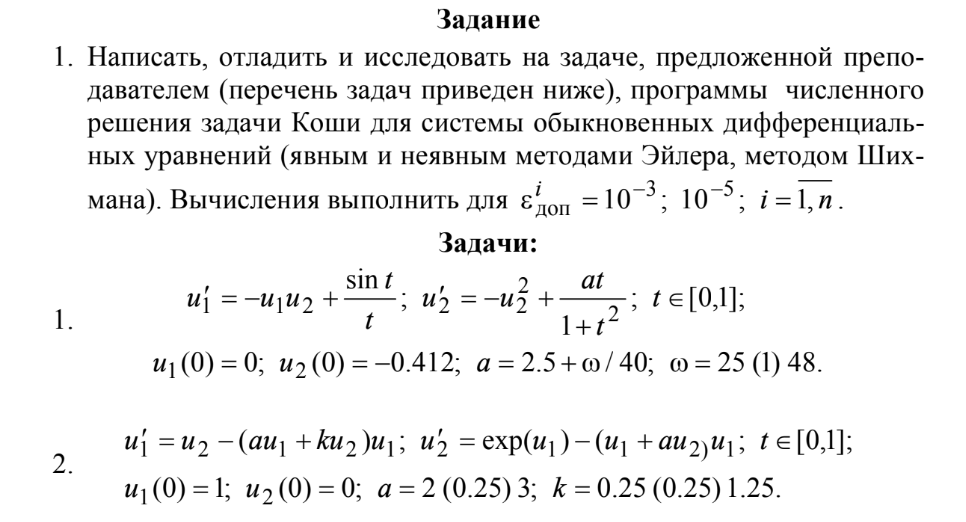

In [ ]:
from scipy.optimize import newton
import math

# Параметры
a = 2
k = 0.25
e_i_dop = 1e-3
h_min = 0.0001
h_max = 0.01
h = h_min
h1 = h_min

# Начальные условия
u1 = [1.0]  # u1(0)
u2 = [0.0]  # u2(0)
t = 0.0

def u1_diff(u1_val, u2_val, a, k):
    return u2_val - (a * u1_val + k * u2_val) * u1_val

def u2_diff(u1_val, u2_val, a, k):
    return math.exp(u1_val) - (u1_val + a * u2_val) * u1_val

# Первые 2 шага явным Эйлером (для инициализации)
for _ in range(2):
    u1_new = u1[-1] + h * u1_diff(u1[-1], u2[-1], a, k)  # Используем последние значения
    u2_new = u2[-1] + h * u2_diff(u1[-1], u2[-1], a, k)
    u1.append(u1_new)
    u2.append(u2_new)
    t += h

# Неявный метод Эйлера
while t < 1:
    h = min(h, 1 - t)  # Корректируем последний шаг
    if h < h_min:
        break

    def Fu1(u1_next):
        return u1_next - u1[-1] - h * u1_diff(u1_next, u2[-1], a, k)

    def Fu2(u2_next):
        return u2_next - u2[-1] - h * u2_diff(u1[-1], u2_next, a, k)

    u1_new = newton(Fu1, u1[-1])
    u2_new = newton(Fu2, u2[-1])

    # Оценка погрешности
    e1 = (h / (h + h1)) * (u1_new - u1[-1] - (h/h1)*(u1[-1] - u1[-2]))
    e2 = (h / (h + h1)) * (u2_new - u2[-1] - (h/h1)*(u2[-1] - u2[-2]))


    if max(abs(e1), abs(e2)) > e_i_dop:
        h /= 2
        continue


    u1.append(u1_new)
    u2.append(u2_new)
    t += h

    # Обновление шага
    h_new = h * min(2, (e_i_dop / max(abs(e1), abs(e2))))**0.5
    h1 = h
    h = max(min(h_new, h_max), h_min)

print(f"Решение: u1={u1[-1]}, u2={u2[-1]}")

Решение: u1=0.5746018467594848, u2=0.8640563176349056


In [ ]:
from scipy.optimize import newton
import math
import numpy as np
import matplotlib.pyplot as plt


a_values = np.arange(2, 3.25, 0.25)  # 2.0, 2.25, ..., 3.0
k_values = np.arange(0.25, 1.5, 0.25)  # 0.25, 0.5, ..., 1.25

e_i_dop = 1e-3
h_min = 0.0001
h_max = 0.01

# Функции производных
def u1_diff(u1_val, u2_val, a, k):
    return u2_val - (a * u1_val + k * u2_val) * u1_val

def u2_diff(u1_val, u2_val, a, k):
    return math.exp(u1_val) - (u1_val + a * u2_val) * u1_val

import os
if not os.path.exists('plots'):
    os.makedirs('plots')


for a in a_values:
    for k in k_values:
        print(f"\n=== Расчет для a={a:.2f}, k={k:.2f} ===")


        h = h_min
        h1 = h_min
        u1 = [1.0]
        u2 = [0.0]
        t_values = [0.0]
        iterations = 0


        print("\nИнициализация явным методом Эйлера:")
        for _ in range(2):
            u1_new = u1[-1] + h * u1_diff(u1[-1], u2[-1], a, k)
            u2_new = u2[-1] + h * u2_diff(u1[-1], u2[-1], a, k)
            u1.append(u1_new)
            u2.append(u2_new)
            t_values.append(t_values[-1] + h)
            iterations += 1
            print(f"Итерация {iterations}: t={t_values[-1]:.4f}, u1={u1[-1]:.6f}, u2={u2[-1]:.6f}")

        # Неявный метод Эйлера
        print("\nОсновной расчет неявным методом:")
        while t_values[-1] < 1:
            h = min(h, 1 - t_values[-1])
            if h < h_min:
                print("Достигнут минимальный шаг интегрирования")
                break

            def Fu1(u1_next):
                return u1_next - u1[-1] - h * u1_diff(u1_next, u2[-1], a, k)

            def Fu2(u2_next):
                return u2_next - u2[-1] - h * u2_diff(u1[-1], u2_next, a, k)

            try:
                u1_new = newton(Fu1, u1[-1])
                u2_new = newton(Fu2, u2[-1])
            except Exception as e:
                print(f"Ошибка решения: {str(e)}")
                break

            # Оценка погрешности
            if len(u1) >= 3:
                e1 = (h / (h + h1)) * (u1_new - u1[-1] - (h/h1)*(u1[-1] - u1[-2]))
                e2 = (h / (h + h1)) * (u2_new - u2[-1] - (h/h1)*(u2[-1] - u2[-2]))
            else:
                e1, e2 = 0, 0

            if max(abs(e1), abs(e2)) > e_i_dop:
                h /= 2
                print(f"Уменьшаем шаг до {h:.6f}")
                continue

            u1.append(u1_new)
            u2.append(u2_new)
            t_values.append(t_values[-1] + h)
            iterations += 1

            # Вывод информации о текущей итерации
            print(f"Итерация {iterations}: t={t_values[-1]:.4f}, h={h:.6f}, u1={u1[-1]:.6f}, u2={u2[-1]:.6f}")

            # Адаптация шага
            if max(abs(e1), abs(e2)) > 0:
                h_new = h * min(2, (e_i_dop / max(abs(e1), abs(e2)))**0.5)
            else:
                h_new = h * 2
            h1 = h
            h = max(min(h_new, h_max), h_min)

        # Вывод итоговых результатов
        print(f"\nИтоговые результаты для a={a:.2f}, k={k:.2f}:")
        print(f"Количество итераций: {iterations}")
        print(f"При t=1: u1={u1[-1]:.6f}, u2={u2[-1]:.6f}")

        # Построение графиков
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(t_values, u1, 'b-', label='u1(t)')
        plt.plot(t_values, u2, 'r-', label='u2(t)')
        plt.xlabel('Время t')
        plt.ylabel('Значения u1, u2')
        plt.title(f'Решение системы (a={a:.2f}, k={k:.2f})')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(u1, u2, 'g-')
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.title('Фазовый портрет')
        plt.grid(True)

        # Сохранение графиков
        filename = f"plots/a_{a:.2f}_k_{k:.2f}.png"
        plt.tight_layout()
        plt.savefig(filename)
        plt.close()

        print(f"Графики сохранены в файл {filename}")


=== Расчет для a=2.00, k=0.25 ===

Инициализация явным методом Эйлера:
Итерация 1: t=0.0001, u1=0.999800, u2=0.000172
Итерация 2: t=0.0002, u1=0.999600, u2=0.000344

Основной расчет неявным методом:
Итерация 3: t=0.0003, h=0.000100, u1=0.999400, u2=0.000515
Итерация 4: t=0.0005, h=0.000200, u1=0.999001, u2=0.000859
Итерация 5: t=0.0009, h=0.000400, u1=0.998204, u2=0.001544
Итерация 6: t=0.0017, h=0.000800, u1=0.996616, u2=0.002913
Итерация 7: t=0.0033, h=0.001600, u1=0.993461, u2=0.005641
Итерация 8: t=0.0065, h=0.003200, u1=0.987237, u2=0.011054
Итерация 9: t=0.0129, h=0.006400, u1=0.975120, u2=0.021718
Итерация 10: t=0.0229, h=0.010000, u1=0.956969, u2=0.037984
Итерация 11: t=0.0329, h=0.010000, u1=0.939603, u2=0.053833
Итерация 12: t=0.0429, h=0.010000, u1=0.922979, u2=0.069292
Итерация 13: t=0.0529, h=0.010000, u1=0.907060, u2=0.084383
Итерация 14: t=0.0629, h=0.010000, u1=0.891809, u2=0.099128
Итерация 15: t=0.0729, h=0.010000, u1=0.877193, u2=0.113545
Итерация 16: t=0.0829, h=0.